In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [20]:
%matplotlib inline

In [21]:
plt.rcParams['figure.figsize'] = (10, 5)

In [22]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [23]:
transmissionlines_data = pd.read_csv("ElectricityTransmissionLines_v2.csv")
print("done")

done


In [24]:
transmissionlines_data.head()

,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,CAPACITYKV,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,SHAPE_Length
0,1,Transmission Line,A network of wires and insulators used to conn...,Overhead,1,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.010167
1,2,Transmission Line,A network of wires and insulators used to conn...,Overhead,2,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.011240
2,3,Transmission Line,A network of wires and insulators used to conn...,Overhead,3,Calvale to Callide A Power Station,Operational,132,Queensland,5,20120710,NaN,0.009304
3,4,Transmission Line,A network of wires and insulators used to conn...,Overhead,4,Braemar to Bulli Creek,Operational,330,Queensland,5,20120710,NaN,0.830194
4,5,Transmission Line,A network of wires and insulators used to conn...,Overhead,5,Moura to Biloela Tee,Operational,132,Queensland,5,20120710,NaN,0.466893


In [25]:
transmissionlines_data.columns

Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
       'OPERATIONALSTATUS', 'CAPACITYKV', 'STATE', 'SPATIALCONFIDENCE',
       'REVISED', 'COMMENT', 'SHAPE_Length'],
      dtype='object')

In [26]:
row_1 = transmissionlines_data.iloc[1]
row_1

OBJECTID                                                             2
FEATURETYPE                                          Transmission Line
DESCRIPTION          A network of wires and insulators used to conn...
CLASS                                                         Overhead
FID                                                                  2
NAME                                Callide B Power Station to Calvale
OPERATIONALSTATUS                                          Operational
CAPACITYKV                                                         275
STATE                                                       Queensland
SPATIALCONFIDENCE                                                    5
REVISED                                                       20120710
COMMENT                                                            NaN
SHAPE_Length                                                   0.01124
Name: 1, dtype: object

In [27]:
row_1["DESCRIPTION"]

'A network of wires and insulators used to connect and transport high voltage electricity from generators to large demand customers and the lower voltage electricity distribution network'

In [28]:
transmissionlines_data["CAPACITYKV"]

0       275
1       275
2       132
3       330
4       132
       ... 
4745    132
4746    132
4747    132
4748    132
4749     66
Name: CAPACITYKV, Length: 4750, dtype: int64

<AxesSubplot:>

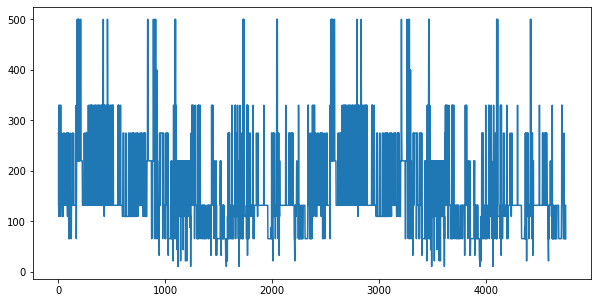

In [29]:
transmissionlines_data["CAPACITYKV"].plot()

<AxesSubplot:>

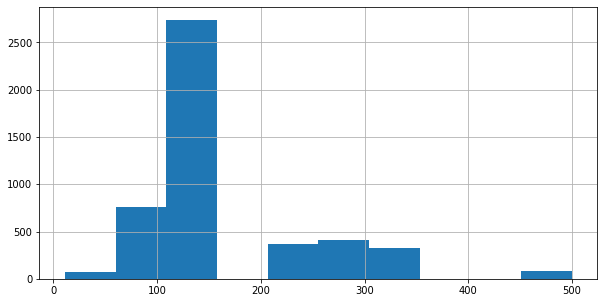

In [30]:
transmissionlines_data["CAPACITYKV"].hist()

<AxesSubplot:>

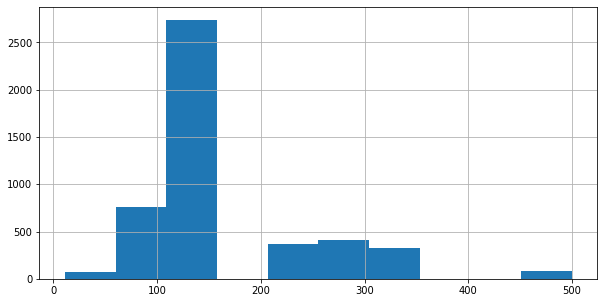

In [31]:
transmissionlines_data.CAPACITYKV[transmissionlines_data.CAPACITYKV < 600].hist()

In [32]:
transmissionlines_data["CAPACITYKV"].value_counts()

132    2158
66      746
110     580
275     410
220     366
330     326
500      84
33       28
22       26
11       10
88       10
44        4
400       2
Name: CAPACITYKV, dtype: int64

<AxesSubplot:>

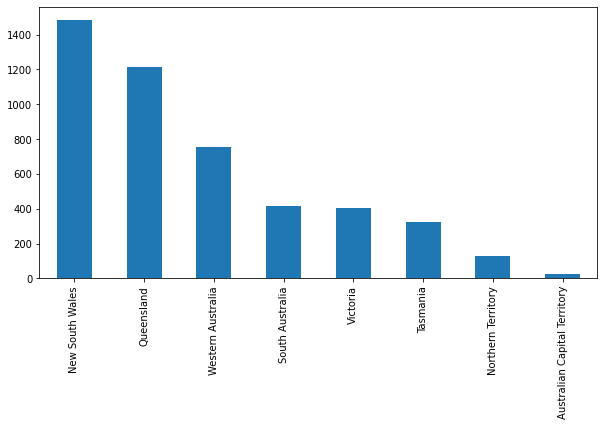

In [33]:
transmissionlines_data["STATE"].value_counts().plot(kind="bar")

In [34]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [36]:
burbs = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(2)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,DESCRIPTON,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry
1191,Warringah to Sydney East,None,1,1,None,Transmission Line,0.0137158655170658,Warringah to Sydney East,1841,5,20120710,A network of wires and insulators used to conn...,132,New South Wales,Operational,1856,Underground,"LINESTRING (151.204 -33.739, 151.208 -33.727, ..."
44,Columboola to Condamine Power Station,None,1,1,None,Transmission Line,0.0238292094213423,Columboola to Condamine Power Station,92,5,20120710,A network of wires and insulators used to conn...,132,Queensland,Operational,92,Overhead,"LINESTRING (150.279 -26.648, 150.278 -26.649, ..."


In [101]:
cols_to_drop = ["DESCRIPTON", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(2)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid,distance_from_UNSW
0,Callide B Power Station to Calvale,None,1,1,None,Transmission Line,0.0101670994252775,Callide B Power Station to Calvale,1,5,20120710,275,Queensland,Operational,1,Overhead,"LINESTRING (150.620 -24.345, 150.620 -24.346, ...",POINT (150.62339 -24.34495),9.592123
1,Callide B Power Station to Calvale,None,1,1,None,Transmission Line,0.0112400629710936,Callide B Power Station to Calvale,2,5,20120710,275,Queensland,Operational,2,Overhead,"LINESTRING (150.627 -24.343, 150.626 -24.343, ...",POINT (150.62308 -24.34530),9.591798


<AxesSubplot:>

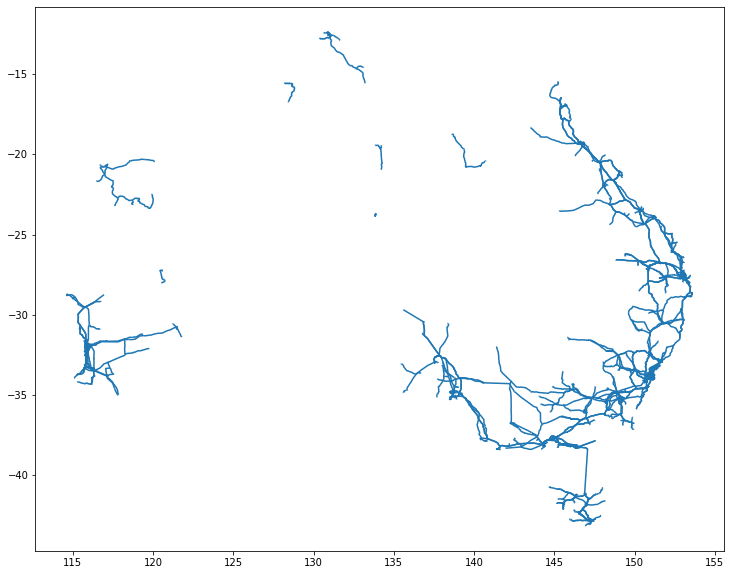

In [38]:
burbs.geometry.plot()

Name                         Callide B Power Station to Calvale
descriptio                                                 None
tessellate                                                    1
visibility                                                    1
COMMENT                                                    None
FEATURETYP                                    Transmission Line
SHAPE_Leng                                   0.0101670994252775
NAME2                        Callide B Power Station to Calvale
OBJECTID                                                      1
SPATIALCON                                                    5
REVISED                                                20120710
DESCRIPTON    A network of wires and insulators used to conn...
CAPACITYKV                                                  275
STATE                                                Queensland
OPERATIONA                                          Operational
FID                                     

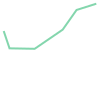

In [39]:
a = burbs.iloc[0]
print(a)
a.geometry

In [40]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

burbs.sample(2)

c:\Users\Evan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,DESCRIPTON,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid
2073,Cannington Terminal to Tate Street,None,1,1,None,Transmission Line,0.0340337501628197,Cannington Terminal to Tate Street,1378,5,20120710,A network of wires and insulators used to conn...,66,Western Australia,Operational,1388,Overhead,"LINESTRING (115.942 -32.019, 115.941 -32.019, ...",POINT (115.93197 -32.00816)
1182,Parklea to Tee,None,1,1,None,Transmission Line,0.00546653460589169,Parklea to Tee,1947,4,20100313,A network of wires and insulators used to conn...,132,New South Wales,Operational,1963,Overhead,"LINESTRING (150.936 -33.720, 150.937 -33.720, ...",POINT (150.93821 -33.72215)


POINT (150.62339098942996 -24.344950770484452)


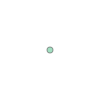

In [41]:
a = burbs.iloc[0]
print(a.centroid)
a.centroid

<AxesSubplot:>

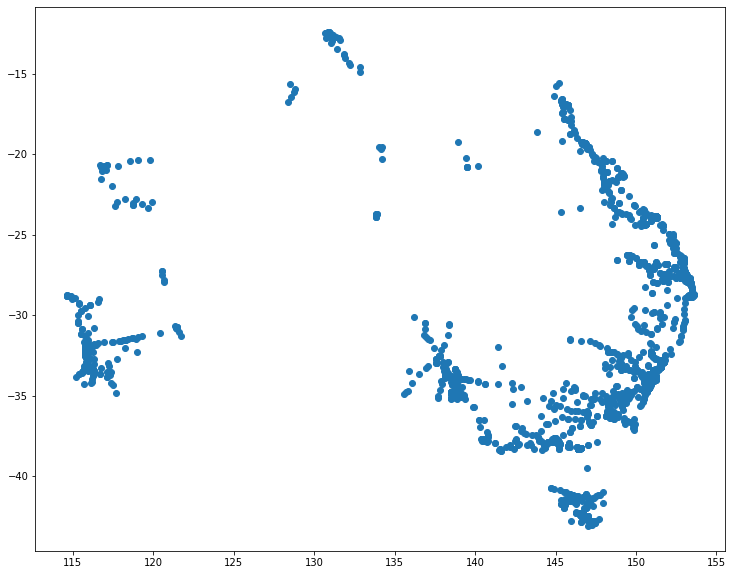

In [42]:
burbs.centroid.plot()

In [43]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

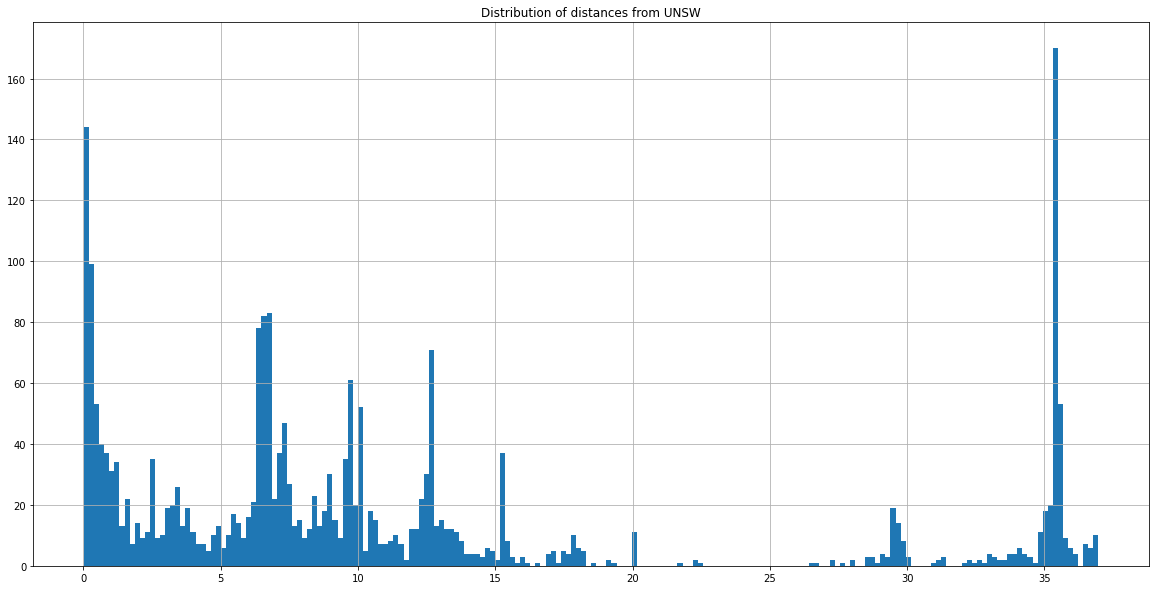

In [44]:
burbs.distance_from_UNSW.hist(bins=200)
plt.title("Distribution of distances from UNSW");

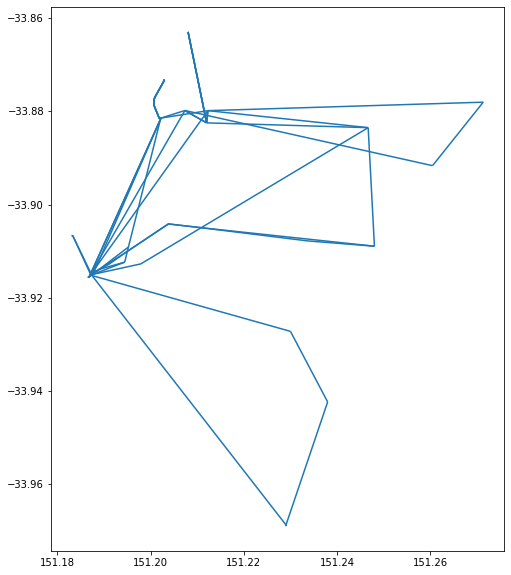

In [45]:
close_burbs = burbs[burbs.distance_from_UNSW < 0.05]
close_burbs.plot();

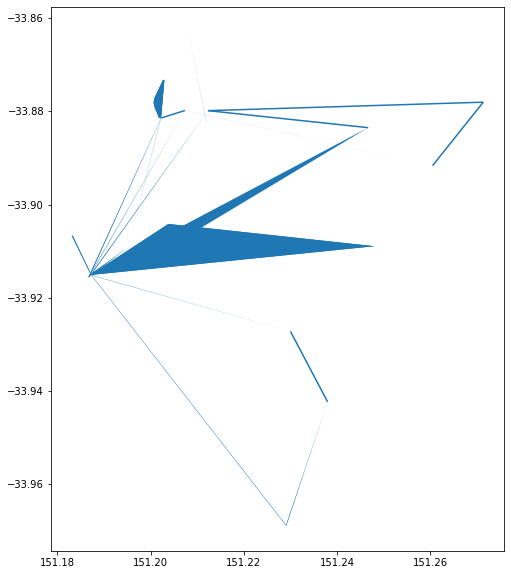

In [46]:
close_burbs.geometry.convex_hull.plot();

In [52]:
burbs.sample(2)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,DESCRIPTON,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid,distance_from_UNSW
1020,Invicta Mill Power Station to Invicta Mill Sub...,None,1,1,None,Transmission Line,0.00112279929199977,Invicta Mill Power Station to Invicta Mill Sub...,1606,2,20120710,A network of wires and insulators used to conn...,66,Queensland,Operational,1618,Overhead,"LINESTRING (147.107 -19.517, 147.107 -19.517)",POINT (147.10700 -19.51700),14.979458
379,Belmont-H3 to Tee,None,1,1,None,Transmission Line,0.0446130398434046,Belmont-H3 to Tee,628,5,20120710,A network of wires and insulators used to conn...,110,Queensland,Operational,631,Overhead,"LINESTRING (153.115 -27.537, 153.115 -27.536, ...",POINT (153.12351 -27.52154),6.670728


In [94]:
transmissionlines_data.groupby("STATE").CAPACITYKV.mean()

STATE
Australian Capital Territory    132.000000
New South Wales                 157.471063
Northern Territory               71.238095
Queensland                      157.310855
South Australia                 160.875000
Tasmania                        138.478528
Victoria                        234.119403
Western Australia               133.400531
Name: CAPACITYKV, dtype: float64

In [96]:
transmissionlines_data.groupby("STATE").FEATURETYPE.value_counts()

STATE                         FEATURETYPE      
Australian Capital Territory  Transmission Line      24
New South Wales               Transmission Line    1486
Northern Territory            Transmission Line     126
Queensland                    Transmission Line    1216
South Australia               Transmission Line     416
Tasmania                      Transmission Line     326
Victoria                      Transmission Line     402
Western Australia             Transmission Line     754
Name: FEATURETYPE, dtype: int64

In [108]:
shape_len = transmissionlines_data.groupby("SHAPE_Length").OBJECTID.value_counts()
shape_len.sample(100)

In [138]:
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
tlines.sample(2)
cols_to_drop = ["DESCRIPTON", "descriptio", "tessellate","visibility","COMMENT", "FEATURETYP","NAME2","OBJECTID","SPATIALCON","REVISED","CAPACITYKV","STATE","OPERATIONA","FID","CLASS"]
tlines.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
tlines.sample(2)
tlines.sort_values("SHAPE_Leng").iloc[0]

Name                Tumut 2 Power Station to Tumut 2 Substation
SHAPE_Leng                                 0.000131851514850778
geometry      LINESTRING (148.367205871 -35.881414992, 148.3...
Name: 682, dtype: object

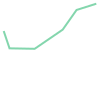

In [134]:
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
tlines.sample(2)
cols_to_drop = ["DESCRIPTON", "descriptio", "tessellate","visibility","COMMENT", "FEATURETYP","NAME2","OBJECTID","SPATIALCON","REVISED","CAPACITYKV","STATE","OPERATIONA","FID","CLASS"]
tlines.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
tlines.sample(2)
c = tlines.iloc[0]
c.geometry